# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [37]:
try:
    df = pd.read_csv("https://raw.githubusercontent.com/Zuckmo/Projek-Machine-Learning---Supply-Chain/refs/heads/master/Dataset%20Inisiasi.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("https://raw.githubusercontent.com/Zuckmo/Projek-Machine-Learning---Supply-Chain/refs/heads/master/Dataset%20Inisiasi.csv", encoding='latin-1')

df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154733 entries, 0 to 154732
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Benefit per order  154733 non-null  float64
 1   Sales              154733 non-null  float64
 2   Customer Country   154733 non-null  object 
 3   Customer Segment   154733 non-null  object 
 4   Department Name    154733 non-null  object 
 5   Shipping Mode      154733 non-null  object 
 6   Cluster            154733 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 8.3+ MB


,Benefit per order,Sales,Customer Country,Customer Segment,Department Name,Shipping Mode,Cluster
count,154733.000000,154733.000000,154733,154733,154733,154733,154733.000000
unique,NaN,NaN,2,3,11,4,NaN
top,NaN,NaN,EE. UU.,Consumer,Fan Shop,Standard Class,NaN
freq,NaN,NaN,95328,80049,56876,92371,NaN
mean,40.790148,187.905325,NaN,NaN,NaN,NaN,2.574939
std,40.063303,102.353092,NaN,NaN,NaN,NaN,1.399491
min,-71.059998,9.990000,NaN,NaN,NaN,NaN,0.000000
25%,13.040000,119.980003,NaN,NaN,NaN,NaN,2.000000
50%,35.189999,179.970001,NaN,NaN,NaN,NaN,3.000000
75%,64.800003,250.000000,NaN,NaN,NaN,NaN,4.000000


In [38]:
df.head()

,Benefit per order,Sales,Customer Country,Customer Segment,Department Name,Shipping Mode,Cluster
0,91.250000,327.75,Puerto Rico,Consumer,Fitness,Standard Class,2
1,22.860001,327.75,EE. UU.,Home Office,Fitness,Standard Class,1
2,134.210007,327.75,Puerto Rico,Corporate,Fitness,Standard Class,0
3,18.580000,327.75,EE. UU.,Consumer,Fitness,Standard Class,3
4,95.180000,327.75,Puerto Rico,Home Office,Fitness,First Class,5


In [39]:
from sklearn.preprocessing import MinMaxScaler
df_encoded = pd.get_dummies(df, columns=["Customer Country","Customer Segment","Department Name","Shipping Mode"])


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [40]:
X = df_encoded.drop(columns=["Cluster"])
y = df_encoded["Cluster"]



In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"jumlah data latih: {X_train.shape[0]}")
print(f"jumlah data uji: {X_test.shape[0]}")

jumlah data latih: 123786
jumlah data uji: 30947


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [42]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#prediksi
y_pred_dt = dt.predict(X_test)

#Evaluasi
print("\n=== Decission Tree ====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt))
print("F1.score :", f1_score(y_test, y_pred_dt, average="weighted"))
print("Classification Report :\n", classification_report(y_test, y_pred_dt))


=== Decission Tree ====
Akurasi : 1.0
F1.score : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3683
           1       1.00      1.00      1.00      3314
           2       1.00      1.00      1.00      6126
           3       1.00      1.00      1.00      9993
           4       1.00      1.00      1.00      5677
           5       1.00      1.00      1.00      2154

    accuracy                           1.00     30947
   macro avg       1.00      1.00      1.00     30947
weighted avg       1.00      1.00      1.00     30947



In [43]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#prediksi
y_pred_knn = knn.predict(X_test)
#evaluasi
print("\n=== K-Nearest Neihbors ===")
print("\nAkyrasi :", accuracy_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn, average="weighted"))
print("Classification report :", classification_report(y_test, y_pred_knn))




=== K-Nearest Neihbors ===

Akyrasi : 0.9491711636022878
F1 Score : 0.9488530596944101
Classification report :               precision    recall  f1-score   support

           0       0.92      0.95      0.93      3683
           1       0.94      0.92      0.93      3314
           2       0.95      0.96      0.95      6126
           3       0.95      0.98      0.96      9993
           4       0.96      0.94      0.95      5677
           5       0.98      0.83      0.90      2154

    accuracy                           0.95     30947
   macro avg       0.95      0.93      0.94     30947
weighted avg       0.95      0.95      0.95     30947



Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.


=== Evaluasi Decission Tree ===
Akurasi : 1.0
F1 score : 1.0
precision : 1.0
recall : 1.0
confusion matrix :
 [[3683    0    0    0    0    0]
 [   0 3314    0    0    0    0]
 [   0    0 6126    0    0    0]
 [   0    0    0 9993    0    0]
 [   0    0    0    0 5677    0]
 [   0    0    0    0    0 2154]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3683
           1       1.00      1.00      1.00      3314
           2       1.00      1.00      1.00      6126
           3       1.00      1.00      1.00      9993
           4       1.00      1.00      1.00      5677
           5       1.00      1.00      1.00      2154

    accuracy                           1.00     30947
   macro avg       1.00      1.00      1.00     30947
weighted avg       1.00      1.00      1.00     30947


=== K-Nearest Neighbors (KNN) ===
Akurasi : 0.9491711636022878
F1 score : 0.9488530596944101
precision : 0.9496895927148838

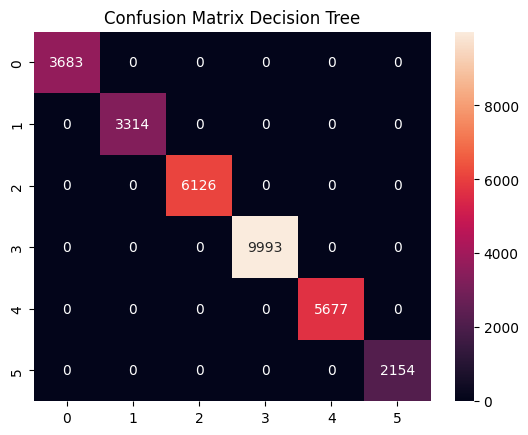

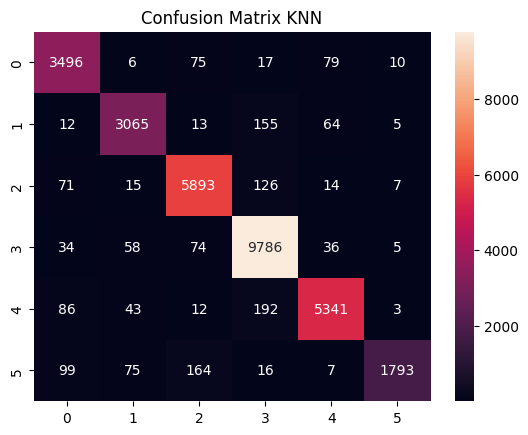

In [44]:
# evaluasi model Decission Tree
print("\n=== Evaluasi Decission Tree ===")
print("Akurasi :", accuracy_score(y_test, y_pred_dt))
print("F1 score :", f1_score(y_test, y_pred_dt, average="weighted"))
print("precision :", precision_score(y_test, y_pred_dt, average="weighted"))
print("recall :", recall_score(y_test, y_pred_dt, average="weighted"))
print("confusion matrix :\n", confusion_matrix(y_test, y_pred_dt))
print("Classification report:", classification_report(y_test, y_pred_dt))

# evaluasi model  KNN
print("\n=== K-Nearest Neighbors (KNN) ===")
print("Akurasi :", accuracy_score(y_test, y_pred_knn))
print("F1 score :", f1_score(y_test, y_pred_knn, average="weighted"))
print("precision :", precision_score(y_test, y_pred_knn, average="weighted"))
print("recall :", recall_score(y_test, y_pred_knn, average="weighted"))
print("confusion matrix :\n", confusion_matrix(y_test, y_pred_knn))
print("Classification report:", classification_report(y_test, y_pred_knn))

# visualisasi confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title('Confusion Matrix Decision Tree')
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Confusion Matrix KNN')
plt.show()



Berdasarkan hasil evaluasi, Decision Tree dan K-Nearest Neighbors (KNN) menunjukkan performa yang berbeda.

** Decision Tree:**

Akurasi: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0

---
** K-Nearest Neighbors (KNN):**

Akurasi: 0.94
F1-Score: 0.94
Precision: 0.94
Recall: 0.94

---
** Analisis:**

- Decision Tree memiliki akurasi, F1-Score, Precision, dan Recall yang lebih tinggi dibandingkan dengan KNN.

- Model Decision Tree memiliki performa yang lebih baik secara keseluruhan.

- Dari Classification Report, Decision Tree dan KNN menunjukkan performa yang baik dalam memprediksi setiap kelas.

---
** Kesimpulan:**

- Berdasarkan hasil evaluasi, Decision Tree adalah model yang lebih baik untuk klasifikasi cluster pada dataset ini.

- Model ini memiliki akurasi yang lebih tinggi dan menyeimbangkan presisi dan recall.



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [45]:
# Tuning hyperparameter untuk KNN menggunakan GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid_knn,
                           cv=5,
                           scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print("\nBest Hyperparameters KNN:", grid_search_knn.best_params_)
print("Best Accuracy KNN:", grid_search_knn.best_score_)


# Membangun model KNN dengan hyperparameter terbaik
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
best_knn.fit(X_train, y_train)

# Evaluasi model KNN dengan hyperparameter terbaik
y_pred_best_knn = best_knn.predict(X_test)

print("\n=== KNN (Tuned) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_best_knn))
print("F1-Score:", f1_score(y_test, y_pred_best_knn, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_best_knn))


Best Hyperparameters KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy KNN: 0.9769602530293457

=== KNN (Tuned) ===
Akurasi: 0.9807412673280124
F1-Score: 0.980671532210446
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3683
           1       0.99      0.96      0.97      3314
           2       0.98      0.99      0.98      6126
           3       0.97      1.00      0.99      9993
           4       0.98      0.98      0.98      5677
           5       0.99      0.93      0.96      2154

    accuracy                           0.98     30947
   macro avg       0.98      0.97      0.98     30947
weighted avg       0.98      0.98      0.98     30947



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [46]:
# Evaluasi model KNN setelah tunning
print("\n=== KNN (Tuned) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_best_knn))
print("F1 score :", f1_score(y_test, y_pred_best_knn, average="weighted"))
print("classificaton report :", classification_report(y_test, y_pred_best_knn))




=== KNN (Tuned) ===
Akurasi: 0.9807412673280124
F1 score : 0.980671532210446
classificaton report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3683
           1       0.99      0.96      0.97      3314
           2       0.98      0.99      0.98      6126
           3       0.97      1.00      0.99      9993
           4       0.98      0.98      0.98      5677
           5       0.99      0.93      0.96      2154

    accuracy                           0.98     30947
   macro avg       0.98      0.97      0.98     30947
weighted avg       0.98      0.98      0.98     30947



# **5. Analisis Hasil Evaluasi Model Klasifikasi**

In [47]:
print("Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning:")
print("Decision Tree:")
print(" - Akurasi Sebelum Tuning:", accuracy_score(y_test, y_pred_dt))
print(" - Decisson Tree tidak perlu di tunning karena sudah sempurna")

print("K-Nearest Neighbors (KNN):")
print(" - Akurasi Sebelum Tuning:", accuracy_score(y_test, y_pred_knn))
print(" - Akurasi Sesudah Tuning:", accuracy_score(y_test, y_pred_best_knn))


Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning:
Decision Tree:
 - Akurasi Sebelum Tuning: 1.0
 - Decisson Tree tidak perlu di tunning karena sudah sempurna
K-Nearest Neighbors (KNN):
 - Akurasi Sebelum Tuning: 0.9491711636022878
 - Akurasi Sesudah Tuning: 0.9807412673280124


---
 **1. Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning:**

Decision Tree:
 - Akurasi Sebelum Tuning: 1.0
Decisson Tree tidak perlu di tunning karena sudah sempurna
K-Nearest Neighbors (KNN):
 - Akurasi Sebelum Tuning: 0.9491711636022878
 - Akurasi Sesudah Tuning: 0.9807412673280124

---

 **2. Identifikasi Kelemahan Model**  
 **Decision Tree (DT)**  
**Hasil Evaluasi:**  
- Akurasi: 1.0 (100%)  
- Precision, Recall, dan F1-score: 1.0 untuk semua kelas  
- Confusion Matrix sempurna, tidak ada kesalahan klasifikasi  

**Kemungkinan Masalah:**  
- Model mengalami **overfitting**, kemungkinan besar hanya menghafal data tanpa mampu mengenali pola baru.  
- Kurangnya variasi dalam data, jika diuji pada dataset baru, akurasinya bisa turun drastis.  
- Tidak ada kesalahan klasifikasi, indikasi bahwa model terlalu kompleks untuk dataset ini.  

---

 **K-Nearest Neighbors (KNN)**  
**Hasil Evaluasi:**  
- Akurasi: 98.07%  
- Precision dan Recall sedikit lebih rendah dibandingkan Decision Tree, tetapi lebih realistis.  
- Confusion Matrix menunjukkan beberapa kesalahan, terutama pada kelas 5 (Recall = 93%), yang berarti model agak kesulitan mengklasifikasikan kelas ini.  

**Kemungkinan Masalah:**  
- Model lebih baik daripada Decision Tree dalam hal generalisasi karena akurasi tidak mencapai 100%.  
- Beberapa kesalahan klasifikasi kecil, tetapi masih dalam batas wajar.  
- Performa cukup stabil dan kemungkinan tidak terlalu overfitting, tetapi perlu diuji lebih lanjut dengan dataset baru.  

---

 **3. Rekomendasi Perbaikan dan Tindakan Lanjutan**  
 **Decision Tree**  
**Langkah Perbaikan:**  
- Mengurangi overfitting dengan **pruning model** menggunakan `max_depth`, `min_samples_split`, atau `min_samples_leaf`.  
- Mencoba model yang lebih mampu melakukan generalisasi, seperti **Random Forest** atau **Gradient Boosting**.  
- Melakukan **cross-validation** untuk menghindari overfitting.  
- Menguji model dengan data baru atau unseen data untuk memastikan model tidak hanya menghafal pola dari data latih.  

---

 **K-Nearest Neighbors (KNN)**  
**Langkah Perbaikan:**  
- Mengatasi kesalahan klasifikasi pada kelas 5 dengan **menyeimbangkan dataset**, misalnya menggunakan teknik **oversampling (SMOTE)** atau menambah fitur yang lebih representatif.  
- Mengoptimalkan hyperparameter dengan mencoba:  
  - `weights='distance'` untuk memberikan bobot lebih besar pada tetangga yang lebih dekat.  
  - Menggunakan metrik selain **Euclidean**, seperti **Minkowski** atau **Manhattan**.  
- Menggunakan data baru untuk validasi, memastikan model diuji dengan data yang tidak pernah dilihat sebelumnya.  

---
